In [541]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [542]:
data=pd.read_csv("diabetes.csv")

In [543]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [544]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


[]

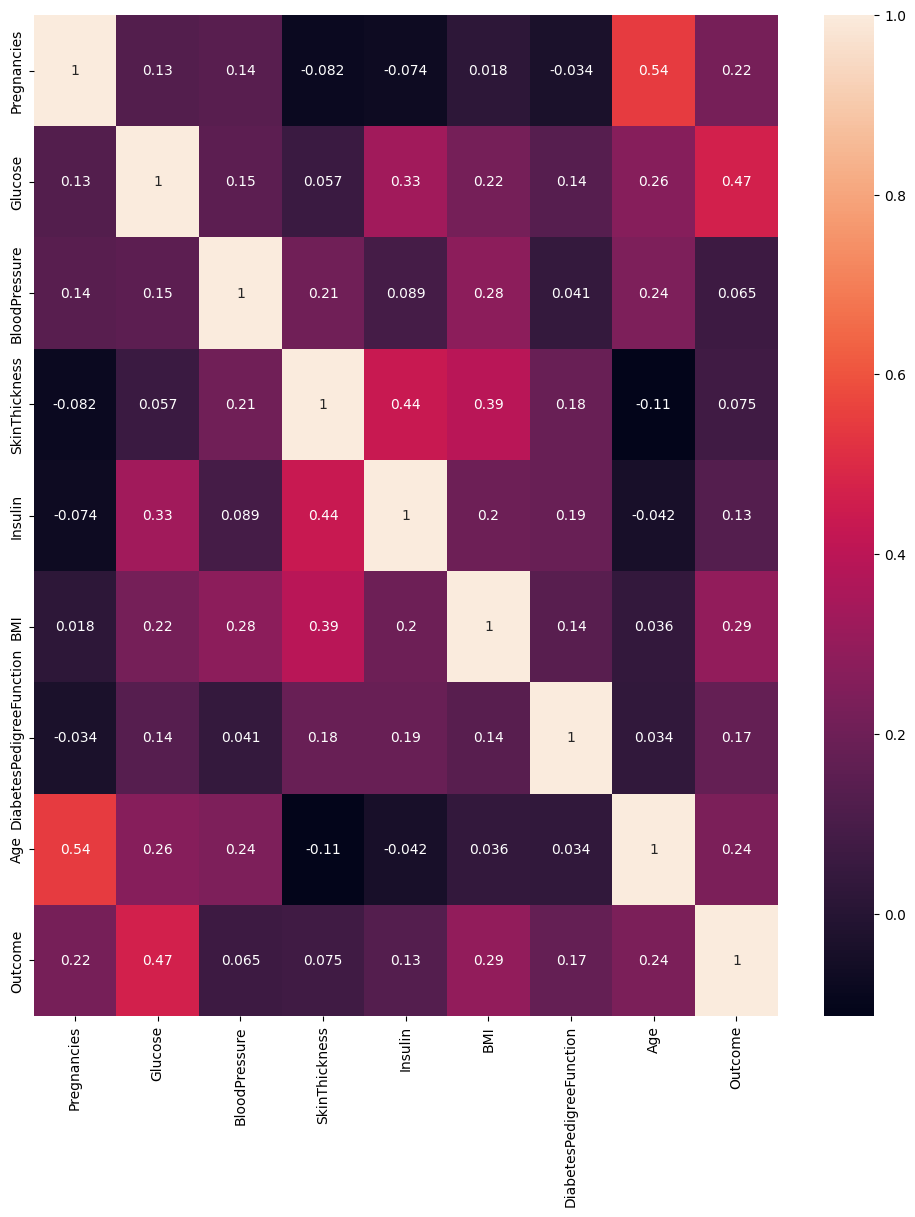

In [546]:
plt.figure(figsize=(12,13))
sns.heatmap(data.corr(),annot=True)
plt.plot()

In [547]:
import statsmodels.formula.api as smf

In [548]:
from sklearn.model_selection import train_test_split

In [549]:
X=data.iloc[:,:-1]

In [550]:
y=data.iloc[:,-1]

In [551]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [552]:
import statsmodels.api as sm
sm = sm.OLS(endog=y, exog=X).fit()
# sm=smf.OLS(y,X).fit()

In [553]:
sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Outcome   R-squared (uncentered):                   0.487
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              90.10
Date:                Wed, 25 Jan 2023   Prob (F-statistic):                   9.04e-105
Time:                        15:43:17   Log-Likelihood:                         -429.34
No. Observations:                 768   AIC:                                      874.7
Df Residuals:                     760   BIC:                                      911.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.0247      0.005      4.536      0.000       0.014       0.035
Glucose                      0.0039      0.001      7.701      0.000       0.003       0.005
BloodPressure               -0.0049      0.001     -6.005      0.000      -0.007      -0.003
SkinThickness             5.752e-05      0.001      0.049      0.961      -0.002       0.002
Insulin                   4.783e-05      0.000      0.304      0.761      -0.000       0.000
BMI                          0.0042      0.002      2.094      0.037       0.000       0.008
DiabetesPedigreeFunction     0.0980      0.048      2.059      0.040       0.005       0.191
Age                         -0.0010      0.002     -0.652      0.515      -0.004       0.002
==============================================================================
Omnibus:                      294.015   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.012
Skew:                           0.574   Prob(JB):                     4.22e-18
Kurtosis:                       1.913   Cond. No.                         575.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [554]:
X=X.values

c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


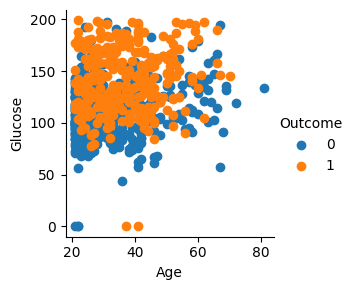

In [555]:
sns.FacetGrid(data,hue="Outcome",height=3)\
.map(plt.scatter,"Age","Glucose")\
.add_legend()

c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\seaborn\axisgrid.py:703: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


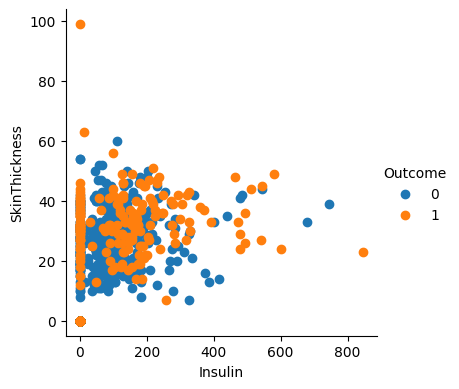

In [556]:
sns.FacetGrid(data,hue="Outcome",height=4)\
.map(plt.scatter,"Insulin","SkinThickness")\
.add_legend()

In [557]:
from scipy import stats

In [558]:
z=np.abs(stats.zscore(data))

In [559]:
threshold=3
print(np.where(z>3))

(array([  4,   7,   8,   9,  13,  15,  45,  49,  49,  58,  60,  60,  75,
        78,  81,  81,  88, 111, 123, 145, 153, 159, 172, 177, 182, 186,
       193, 220, 222, 228, 228, 247, 261, 266, 269, 286, 298, 300, 330,
       332, 336, 342, 347, 349, 357, 370, 370, 371, 371, 395, 409, 415,
       426, 426, 430, 435, 445, 445, 453, 453, 455, 459, 468, 484, 486,
       494, 494, 502, 522, 522, 533, 535, 579, 584, 589, 593, 601, 604,
       619, 621, 643, 645, 655, 666, 673, 684, 684, 695, 697, 703, 706,
       706, 753], dtype=int64), array([6, 2, 4, 5, 4, 2, 6, 2, 5, 6, 2, 5, 1, 2, 2, 5, 0, 4, 7, 5, 4, 0,
       2, 5, 1, 4, 2, 4, 2, 4, 6, 4, 2, 2, 2, 4, 0, 2, 6, 2, 2, 1, 2, 1,
       2, 4, 6, 5, 6, 6, 4, 4, 2, 5, 2, 2, 5, 6, 2, 7, 0, 7, 2, 2, 4, 2,
       5, 1, 2, 5, 2, 2, 3, 4, 2, 6, 2, 2, 2, 6, 2, 4, 4, 7, 5, 5, 7, 4,
       2, 2, 2, 5, 4], dtype=int64))


In [560]:
data1=data

In [561]:
data1=data1[(z<3).all(axis=1)]

In [562]:
data1.shape

(688, 9)

(array([[768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [ 72., 625.,  71.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [656., 112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [767.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [487., 155.,  70.,  30.,   8.,   9.,   5.,   1.,   2.,   1.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [768.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0. ,  84.6, 169.2, 253.8, 338.4, 423. , 507.6, 592.2, 676.8,
        761.4, 846. ]),
 <a list of 9 BarContainer objects>)

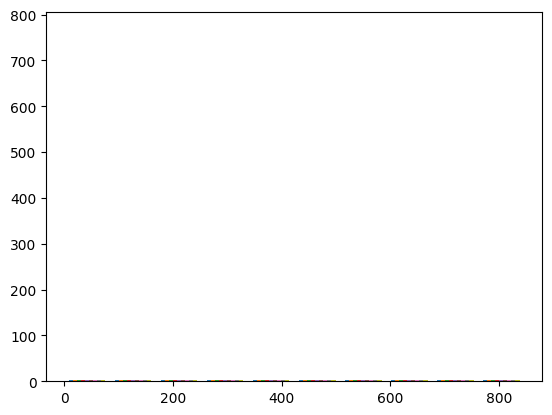

In [563]:
plt.hist(data,height=2)

In [564]:
X=data1.iloc[:,:-1].values

In [565]:
y=data1.iloc[:,-1].values

In [566]:
from sklearn.preprocessing import StandardScaler

In [567]:
s=StandardScaler()

In [568]:
X=s.fit_transform(X)

In [569]:
from sklearn.linear_model import LogisticRegression

In [570]:
SEED = 20
model=LogisticRegression(random_state=SEED)

In [571]:
model.fit(X_train,y_train)

c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=20)

In [572]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.metrics import precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
def evaluate_model(y_val, y_pred):
    """Function to evaluate model and return the metric of the model
  
    It returns a dictionary with the classification metrics.
    """
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred, average='weighted')
    recall = recall_score(y_val, y_pred, average='weighted')
    f1 = f1_score(y_val, y_pred, average='weighted')
  
    result = {"accuracy_score": accuracy,
              "precision_score": precision,
              "recall_score": recall,
              "f1_score": f1}
    return result
def plot_confusion_matrix(y_val, y_pred, label):
    '''function to plot confusion matrix

    Args
    y_val: array. The validation set of the target variable.
    y_pred: array. Model's prediction.
    label: list. A list containing all the classes in the target variable

    Returns
    It returns a plot of the confusion matrix
    '''
    cm = confusion_matrix(y_val, y_pred)
    fig, ax = plt.subplots(figsize=(10,10))
    ConfusionMatrixDisplay(cm, display_labels=label).plot(ax=ax, values_format='', xticks_rotation='vertical')

# class labels
label = ['1','2']

{'accuracy_score': 0.8506493506493507, 'precision_score': 0.8500053154536308, 'recall_score': 0.8506493506493507, 'f1_score': 0.8502886173736282}
{'accuracy_score': 0.8506493506493507, 'precision_score': 0.8500053154536308, 'recall_score': 0.8506493506493507, 'f1_score': 0.8502886173736282}
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       102
           1       0.78      0.77      0.78        52

    accuracy                           0.85       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.85      0.85      0.85       154



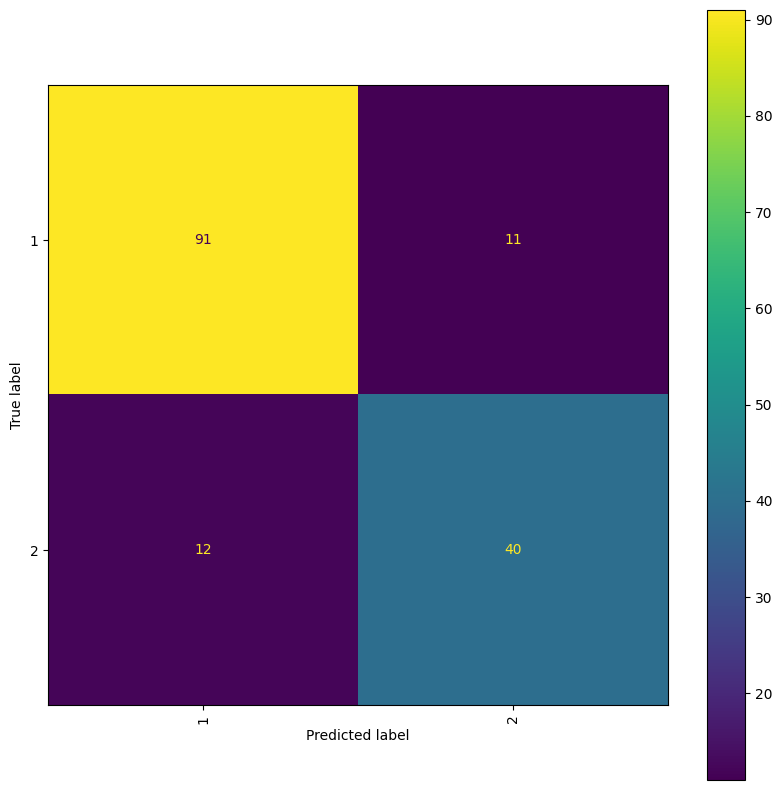

In [573]:
(model.score(X_test,y_test))*100
lr_y_pred = model.predict(X_test)
lr_test_result = evaluate_model(y_test, lr_y_pred)
print(lr_test_result)
print(lr_test_result)
print(classification_report(y_test, lr_y_pred))
plot_confusion_matrix(y_test, lr_y_pred, label)

In [574]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


{'accuracy_score': 0.8051948051948052, 'precision_score': 0.8023258188352529, 'recall_score': 0.8051948051948052, 'f1_score': 0.8031718281718283}
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       102
           1       0.73      0.67      0.70        52

    accuracy                           0.81       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



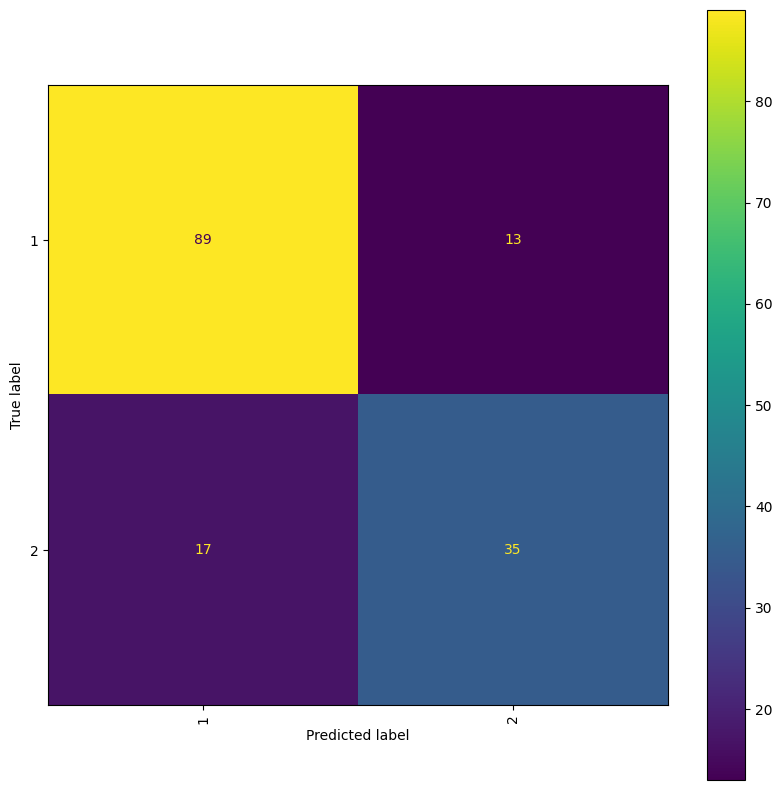

In [575]:
SEED = 20
rf_model = RandomForestClassifier(random_state=SEED)
rf_model.fit(X_train, y_train)

# Evaluate model on the test set
rf_y_pred = rf_model.predict(X_test)

rf_test_result = evaluate_model(y_test, rf_y_pred)
print(rf_test_result)
print(classification_report(y_test, rf_y_pred))
plot_confusion_matrix(y_test, rf_y_pred, label)

c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

{'accuracy_score': 0.8181818181818182, 'precision_score': 0.8148760330578511, 'recall_score': 0.8181818181818182, 'f1_score': 0.814036592338479}
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       102
           1       0.77      0.65      0.71        52

    accuracy                           0.82       154
   macro avg       0.80      0.78      0.79       154
weighted avg       0.81      0.82      0.81       154



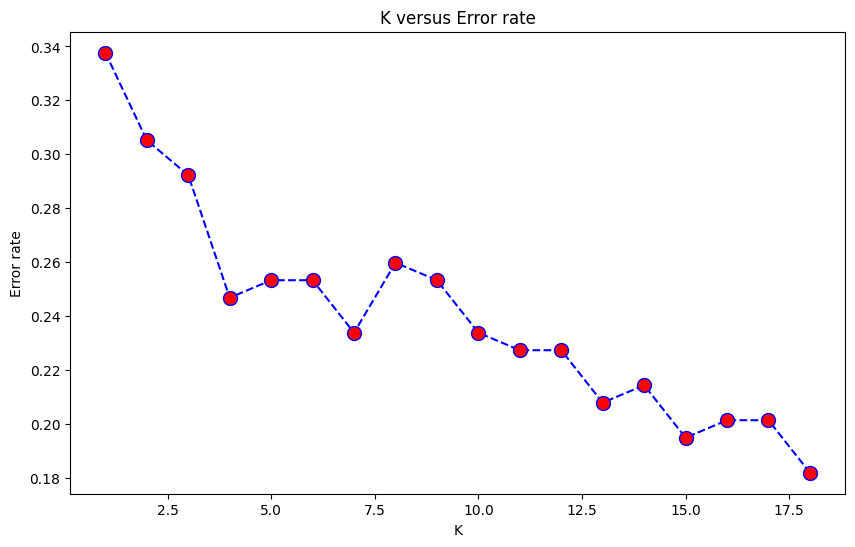

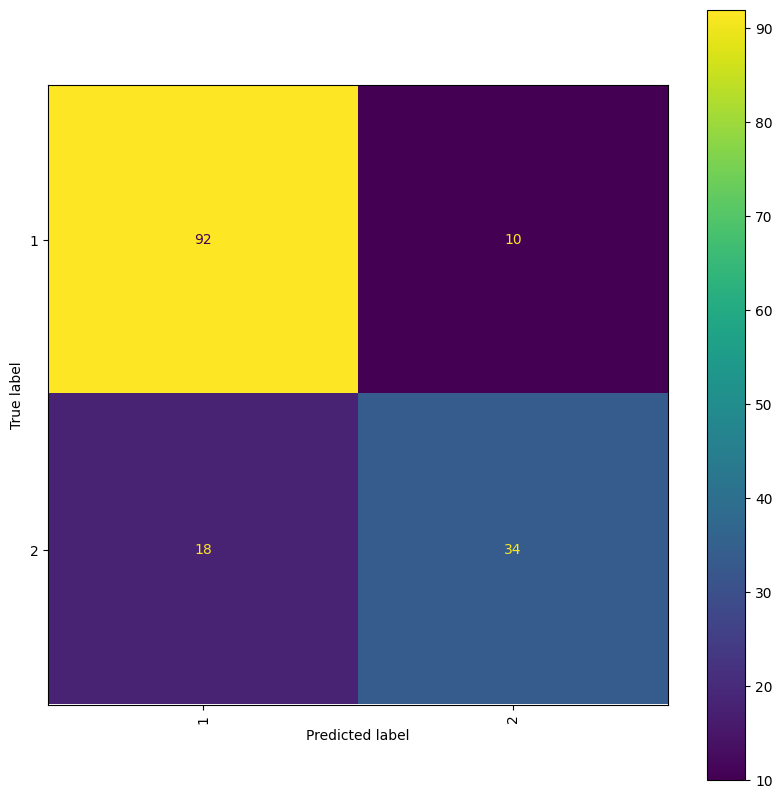

In [576]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []
for i in range(1, 19):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    
   
plt.figure(figsize=(10, 6))

plt.plot(range(1, 19), error_rate, color='blue', linestyle='--',
         markersize=10, markerfacecolor='red', marker='o')
plt.title('K versus Error rate')
plt.xlabel('K')
plt.ylabel('Error rate')
knn_y_pred = knn.predict(X_test)

knn_test_result = evaluate_model(y_test, knn_y_pred)
print(knn_test_result)
print(classification_report(y_test, knn_y_pred))
plot_confusion_matrix(y_test, knn_y_pred, label)

{'accuracy_score': 0.7142857142857143, 'precision_score': 0.7233682266009852, 'recall_score': 0.7142857142857143, 'f1_score': 0.7177489177489177}
              precision    recall  f1-score   support

           0       0.80      0.75      0.78       102
           1       0.57      0.63      0.60        52

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154



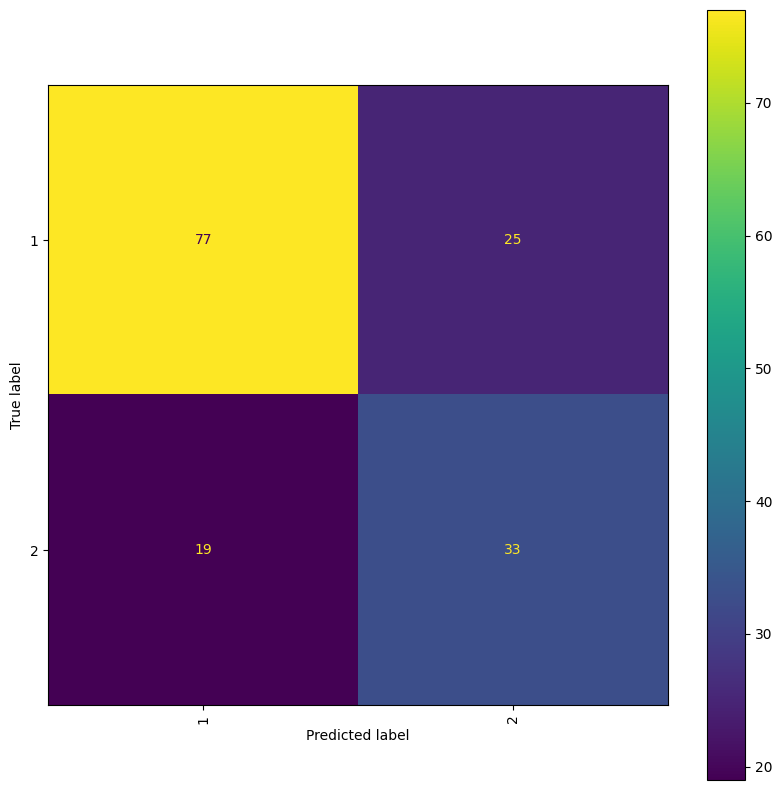

In [577]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf_y_pred = clf.predict(X_test)

clf_test_result = evaluate_model(y_test, clf_y_pred)
print(clf_test_result)
print(classification_report(y_test, clf_y_pred))
plot_confusion_matrix(y_test, clf_y_pred, label)

{'accuracy_score': 0.8571428571428571, 'precision_score': 0.856043956043956, 'recall_score': 0.8571428571428571, 'f1_score': 0.856435778194773}
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       102
           1       0.80      0.77      0.78        52

    accuracy                           0.86       154
   macro avg       0.84      0.84      0.84       154
weighted avg       0.86      0.86      0.86       154



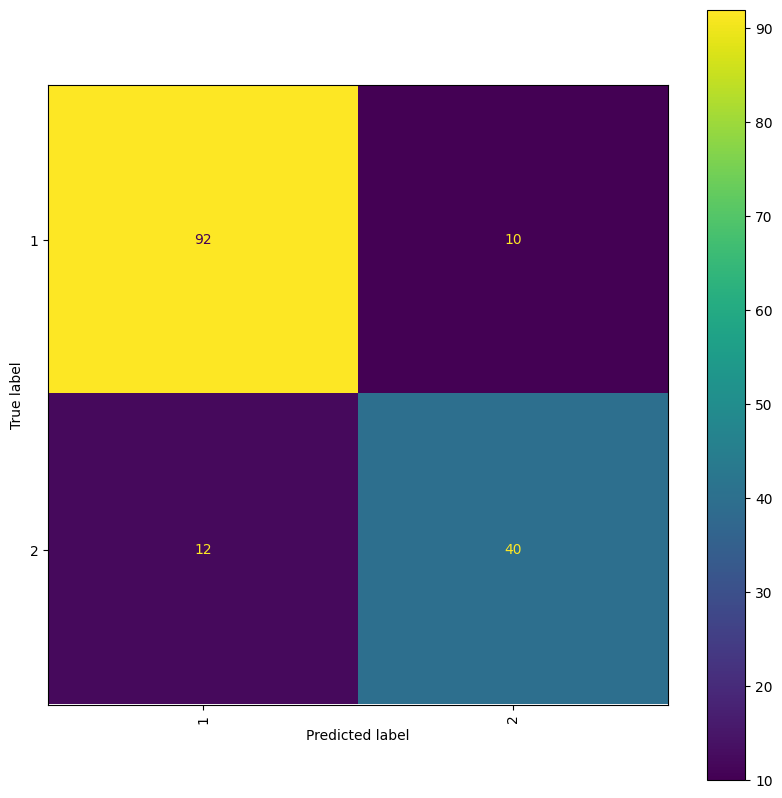

In [578]:
from sklearn import svm
svmtrain= svm.SVC(kernel='linear') 
# linear is the default kernel, you can use also rbf, poly and sigmoid

# training the classifier on the data
svmtrain.fit(X_train, y_train)
svm_y_pred = svmtrain.predict(X_test)
svm_test_result = evaluate_model(y_test, svm_y_pred)

print(svm_test_result)
print(classification_report(y_test, svm_y_pred))
plot_confusion_matrix(y_test, svm_y_pred, label)

[0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0
 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0
 0 1 1 1 1 0]
{'accuracy_score': 0.8311688311688312, 'precision_score': 0.8298001998001999, 'recall_score': 0.8311688311688312, 'f1_score': 0.8303331924120045}
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       102
           1       0.76      0.73      0.75        52

    accuracy                           0.83       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.83      0.83      0.83       154



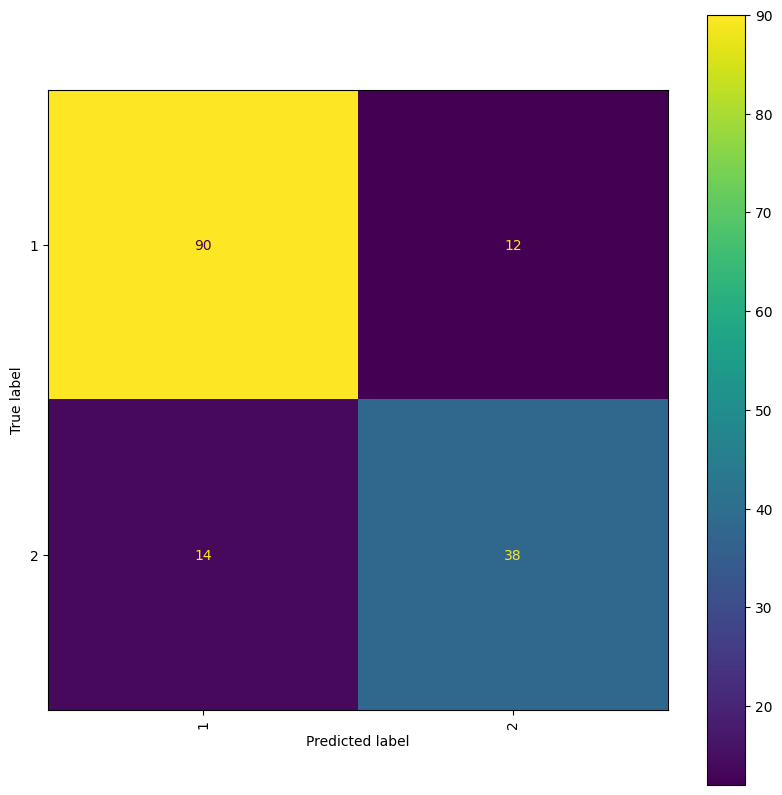

In [579]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# training the classifier on the data
gnb.fit(X_train, y_train)
gnb_y_pred = gnb.predict(X_test)
gnb_test_result = evaluate_model(y_test, gnb_y_pred)
print(gnb_y_pred)
print(gnb_test_result)
print(classification_report(y_test, gnb_y_pred))
plot_confusion_matrix(y_test, gnb_y_pred, label)

c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[0 0 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0
 0 1 1 1 1 0]
{'accuracy_score': 0.8506493506493507, 'precision_score': 0.8500053154536308, 'recall_score': 0.8506493506493507, 'f1_score': 0.8502886173736282}
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       102
           1       0.78      0.77      0.78        52

    accuracy                           0.85       154
   macro avg       0.83      0.83      0.83       154
weighted avg       0.85      0.85      0.85       154



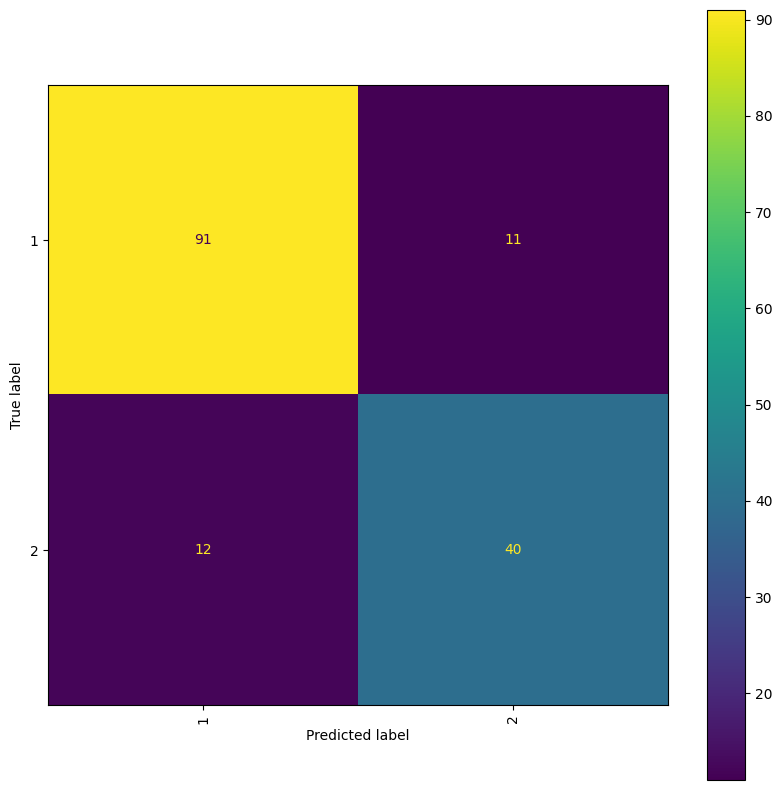

In [594]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(10, 2), random_state=1)
mlp.fit(X_train, y_train)
#ann_test_result = evaluate_model(y_test, ann_y_pred)
mlp_y_pred = mlp.predict(X_test).round()

mlp_test_result = evaluate_model(y_test, mlp_y_pred)
print(mlp_y_pred)
print(mlp_test_result)
print(classification_report(y_test, mlp_y_pred))
plot_confusion_matrix(y_test, mlp_y_pred, label)

In [581]:
results=[]
names=[]
scoring='accuracy'

In [582]:
models=[]
models.append(('LR',LogisticRegression()))
models.append(('LDA',LinearDiscriminantAnalysis()))
models.append(('CART',DecisionTreeClassifier()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('SVM',SVC()))
models.append(('NB',GaussianNB()))
models.append(('RFR',RandomForestClassifier(n_estimators=300)))
print(models)



[('LR', LogisticRegression()), ('LDA', LinearDiscriminantAnalysis()), ('CART', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC()), ('NB', GaussianNB()), ('RFR', RandomForestClassifier(n_estimators=300))]


In [583]:
for name,model in models:
    kfold=KFold(n_splits=10, shuffle=True, random_state=7)
    cv_results=cross_val_score(model,X,y,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg="%s: %f (%f)" % (name,cv_results.mean(),cv_results.std())
    print(msg)
    
for i in range(len(models)):
    print(models[i])
    print(results[i])
    print(names[i])
    
    
                
    

LR: 0.787745 (0.044772)
LDA: 0.786275 (0.046166)
CART: 0.701961 (0.050640)
KNN: 0.751407 (0.041492)


c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\neighbors\_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no long

SVM: 0.764471 (0.040231)
NB: 0.752771 (0.058272)
RFR: 0.767391 (0.032114)
('LR', LogisticRegression())
[0.76811594 0.76811594 0.75362319 0.72463768 0.7826087  0.8115942
 0.84057971 0.88405797 0.75       0.79411765]
LR
('LDA', LinearDiscriminantAnalysis())
[0.76811594 0.76811594 0.75362319 0.72463768 0.76811594 0.82608696
 0.84057971 0.88405797 0.75       0.77941176]
LDA
('CART', DecisionTreeClassifier())
[0.66666667 0.68115942 0.63768116 0.72463768 0.71014493 0.73913043
 0.73913043 0.76811594 0.60294118 0.75      ]
CART
('KNN', KNeighborsClassifier())
[0.76811594 0.71014493 0.73913043 0.68115942 0.76811594 0.73913043
 0.82608696 0.8115942  0.73529412 0.73529412]
KNN
('SVM', SVC())
[0.75362319 0.7826087  0.71014493 0.73913043 0.73913043 0.76811594
 0.8115942  0.85507246 0.73529412 0.75      ]
SVM
('NB', GaussianNB())
[0.72463768 0.71014493 0.69565217 0.71014493 0.76811594 0.8115942
 0.85507246 0.84057971 0.70588235 0.70588235]
NB
('RFR', RandomForestClassifier(n_estimators=300))
[0.7681

In [584]:
from sklearn import metrics

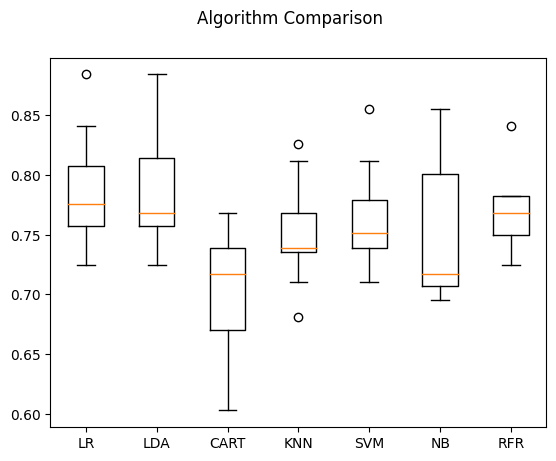

In [585]:
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [586]:
model=LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print("the accuracy of prediction is",metrics.accuracy_score(y_test,prediction) )

the accuracy of prediction is 0.8506493506493507


c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [587]:
X_test.shape

(154, 8)

In [588]:
data2=X_test

In [589]:
data2.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
113,4,76,62,0,0,34.0,0.391,25
474,4,114,64,0,0,28.9,0.126,24
130,4,173,70,14,168,29.7,0.361,33
754,8,154,78,32,0,32.4,0.443,45
127,1,118,58,36,94,33.3,0.261,23


In [590]:
predict=pd.DataFrame(prediction)

In [591]:
predict.columns=["Prediction"]

In [592]:
predict

,Prediction
0,0
1,0
2,1
3,1
4,0
...,...
149,1
150,1
151,1
152,1
